### Assessing cloudless days: clear sky days 

In [1]:
import matplotlib
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
#%matplotlib notebook
%matplotlib inline
import csv
import bisect
import datetime
from scipy import interpolate
from matplotlib.dates import DateFormatter

# User defined functions
from load_data_from_csv import *

#### Import weather station data from Luzern Switzerland

In [2]:
irad_csv = r'irradiation_luz_2017_2018.csv'

df = process_LUZ(irad_csv)
df.set_index(df.datetime, inplace=True)
lu_rad = df['gre000z0']          # 10 min mean in W/m² 

#lu_rad.head(n=2)

#### Import  sunshine duration, daily sum

In [3]:
dur_csv = r'sunshine_duration_2017_2018.csv'

df = process_LUZ_dur(dur_csv)
df.set_index(df.datetime, inplace=True)
df['su2000d0'] = pd.to_numeric(df['su2000d0'], errors='coerce')
lu_dur = df['su2000d0']          # in hours

#### Import sunshine duration, relative to the absolute possible daily sum

In [4]:
dur_csv = r'sunshine_duration_2017_2018.csv'

df = process_LUZ_dur(dur_csv)
df.set_index(df.datetime, inplace=True)
df['sremaxdv'] = pd.to_numeric(df['sremaxdv'], errors='coerce')
lu_rel_dur = df['sremaxdv']          # in %

## Farben:
'b'
'g'
'r'
'c'
'm'
'y'
'k'
'w'

#### Sunshine duration in 2017 at Luzern Long: 8°18' Lat: 47°02'

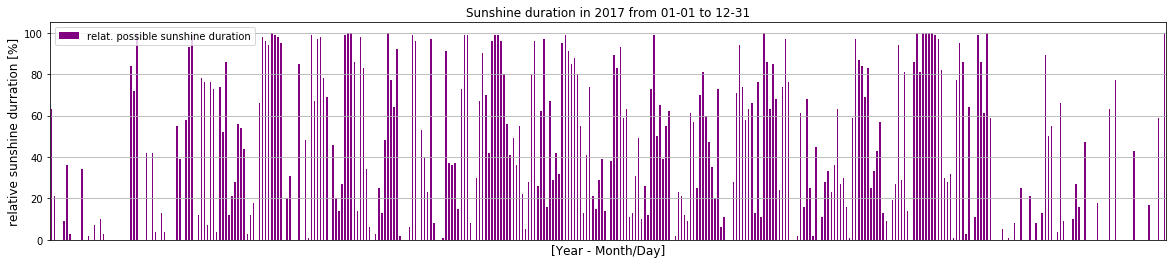

In [23]:
year = '2017-'   
s_day = '01-01' # beginning of observation
e_day = '12-31' # end of observation
start = year + s_day
end   = year + e_day

_lu_dur = lu_dur.loc[start:end]
_lu_rel_dur = lu_rel_dur.loc[start:end]

fig, ax = plt.subplots(figsize=(20,4))

#_lu_dur.plot(kind='bar',label='Solar radiation measurements', color= 'm')
_lu_rel_dur.plot(kind='bar',label='relat. possible sunshine duration', color= 'purple')

ax.set_xlabel('[Year - Month/Day]', fontsize=12)
ax.set_ylabel('relative sunshine durration [%]', fontsize=12)
ax.set_title('Sunshine duration in {} from {} to {}'.format(year.strip('-'),s_day,e_day))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')



#ax.xaxis.set_major_locator(mdates.MonthLocator())  #set ticks every month
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-d')) #set major ticks format



ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.DayLocator())
monthFmt = mdates.DateFormatter('%b')
ax.xaxis.set_major_formatter(monthFmt)

#fig.autofmt_xdate()
#frmt = df.index.to_series().dt.strftime("%Y-%m-d")
#plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(frmt))


